In [36]:
import pandas as pd
import numpy as np


In [37]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
df = pd.concat([train, test])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
df.isnull().sum()

AG_ratio      4
ALP           0
ALT_GPT       0
AST_GOT       0
Age           0
Alb           0
D_Bil         0
Gender        0
TP            0
T_Bil         0
disease     382
id            0
dtype: int64

In [39]:
#前処理
df["AG_ratio"].fillna(df["Alb"] / (df["TP"] - df["Alb"]), inplace=True)

In [40]:
#重複存在してたらtrain.drop_duplicatesで消す
df.duplicated().sum()

0

In [41]:
df.describe()

,AG_ratio,ALP,ALT_GPT,AST_GOT,Age,Alb,D_Bil,TP,T_Bil,disease,id
count,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,891.000000,1273.000000
mean,1.000692,263.442419,66.169128,83.098036,43.220738,3.230793,1.202435,6.523645,2.818225,0.483726,636.000000
std,0.303810,210.923492,162.487463,190.699519,16.559379,0.769624,2.493643,1.033571,5.635125,0.500016,367.627756
min,0.100000,63.000000,9.800000,10.100000,3.000000,0.900000,0.100000,2.600000,0.200000,0.000000,0.000000
25%,0.810000,170.900000,21.900000,23.000000,31.000000,2.700000,0.200000,5.900000,0.800000,0.000000,318.000000
50%,0.990000,197.100000,30.100000,35.000000,44.000000,3.200000,0.300000,6.600000,1.100000,0.000000,636.000000
75%,1.170000,278.900000,51.900000,65.100000,57.000000,3.800000,0.900000,7.200000,2.000000,1.000000,954.000000
max,2.970000,2110.100000,2000.200000,2946.000000,90.000000,5.600000,19.800000,9.600000,75.300000,1.000000,1272.000000


In [42]:
df.head()

,AG_ratio,ALP,ALT_GPT,AST_GOT,Age,Alb,D_Bil,Gender,TP,T_Bil,disease,id
0,1.01,170.9,42.1,37.1,60,2.9,1.3,Male,5.5,2.9,1.0,0
1,1.36,158.8,26.0,23.9,28,3.7,0.1,Female,6.4,0.7,0.0,1
2,0.96,962.0,53.0,40.9,60,3.3,12.5,Male,6.8,23.1,1.0,2
3,1.31,415.9,33.9,39.0,20,3.8,0.5,Male,7.0,1.0,0.0,3
4,1.04,152.9,40.9,42.0,44,2.1,0.3,Female,4.5,0.6,0.0,4


In [43]:
'''
数量変数とカテゴリ変数を分離。diseaseは1,0だが病気にかかってた
ら1、かかってなかったら０なので数字としての意味を持たず、文字と
同じだからカテゴリ変数
'''
#前処理
col = ['Gender','disease']
num = df.drop(col, axis=1) 
categ = df[col]
count_disease = categ['disease'].value_counts()
count_disease

0.0    460
1.0    431
Name: disease, dtype: int64

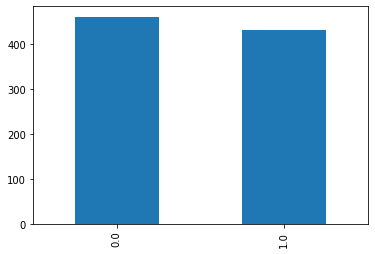

In [44]:
import matplotlib.pyplot as plt
count_disease.plot(kind='bar')
plt.show()

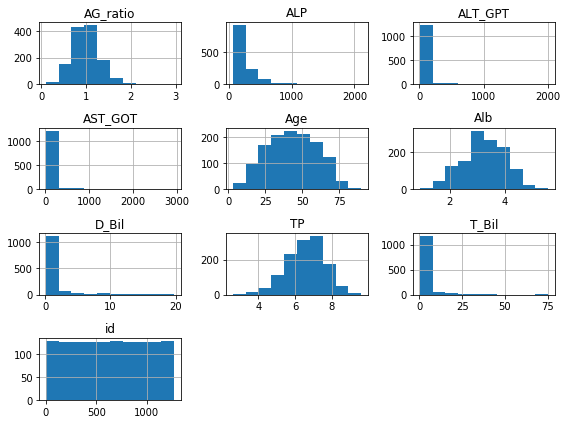

In [45]:
num.hist(figsize=(8,6))
#グラフのラベルが重ならないようにレイアウトを自動調整
plt.tight_layout()
plt.show()

In [46]:
df_tmp = pd.concat([categ['disease'], num],axis=1)
df_tmp.head()

,disease,AG_ratio,ALP,ALT_GPT,AST_GOT,Age,Alb,D_Bil,TP,T_Bil,id
0,1.0,1.01,170.9,42.1,37.1,60,2.9,1.3,5.5,2.9,0
1,0.0,1.36,158.8,26.0,23.9,28,3.7,0.1,6.4,0.7,1
2,1.0,0.96,962.0,53.0,40.9,60,3.3,12.5,6.8,23.1,2
3,0.0,1.31,415.9,33.9,39.0,20,3.8,0.5,7.0,1.0,3
4,0.0,1.04,152.9,40.9,42.0,44,2.1,0.3,4.5,0.6,4


In [47]:
#query関数で条件式を文字列で渡して抽出できる
# diseaseの値が0（疾患なし）のサンプルを表示（最初の5行を表示）
print(df_tmp.query('disease==0').head(5))

# diseaseの値が1（疾患あり）のサンプルを表示（最初の5行を表示）
print(df_tmp.query('disease==1').head(5))

   disease  AG_ratio    ALP  ALT_GPT  AST_GOT  Age  Alb  D_Bil   TP  T_Bil  id
1      0.0      1.36  158.8     26.0     23.9   28  3.7    0.1  6.4    0.7   1
3      0.0      1.31  415.9     33.9     39.0   20  3.8    0.5  7.0    1.0   3
4      0.0      1.04  152.9     40.9     42.0   44  2.1    0.3  4.5    0.6   4
7      0.0      1.43  152.0     89.9     20.9   37  4.3    0.1  7.0    0.8   7
8      0.0      1.04  114.0     20.9     22.9   41  3.1    0.2  7.0    0.9   8
   disease  AG_ratio    ALP  ALT_GPT  AST_GOT  Age  Alb  D_Bil   TP  T_Bil  id
0      1.0      1.01  170.9     42.1     37.1   60  2.9    1.3  5.5    2.9   0
2      1.0      0.96  962.0     53.0     40.9   60  3.3   12.5  6.8   23.1   2
5      1.0      0.64  699.0     64.0    100.1   62  3.3    5.7  7.4   11.1   5
6      1.0      0.81  514.9     48.1     92.1   32  2.5    6.0  6.5   12.4   6
9      1.0      1.21  268.8     58.0     45.1   14  3.9    0.6  6.7    1.7   9


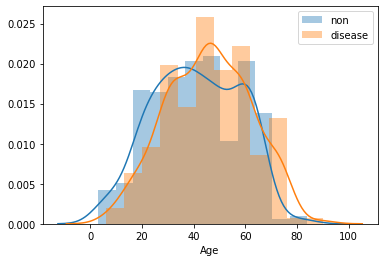

In [48]:
import seaborn as sns
dfnonage = df_tmp.query('disease==0')['Age']
dfdisage = df_tmp.query('disease==1')['Age']

sns.distplot(dfnonage)
sns.distplot(dfdisage)
plt.legend(labels=['non','disease'], loc='upper right')
plt.show()

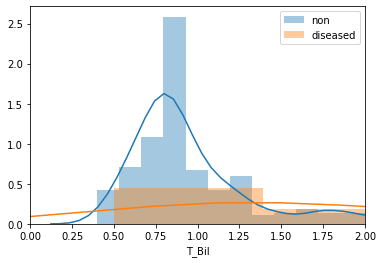

In [49]:
#"T_Bil"データを疾患なしと疾患ありの場合に分ける
df_T_Bil_non = df_tmp.query("disease==0")["T_Bil"]
df_T_Bil_diseased = df_tmp.query("disease==1")["T_Bil"]

#グラフの表示
sns.distplot(df_T_Bil_non)
sns.distplot(df_T_Bil_diseased)
plt.legend(labels = ["non", "diseased"], loc = 'upper right')
plt.xlim(0.0, 2.0)
plt.show()

ValueError: num must be 1 <= num <= 9, not 10

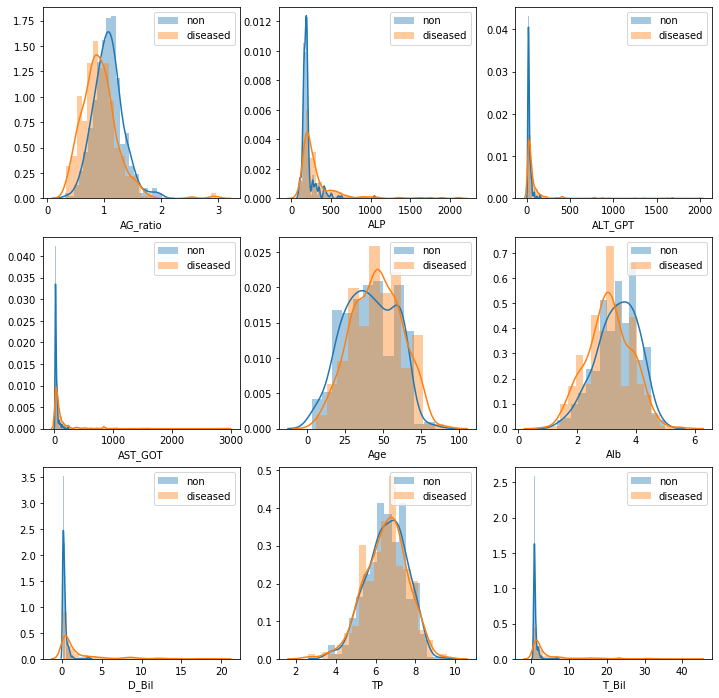

In [50]:
#グラフの表示
plt.figure(figsize=(12, 12))

for ncol, colname in enumerate(num.columns):
    plt.subplot(3, 3, ncol+1)
    sns.distplot(df_tmp.query("disease==0")[colname])
    sns.distplot(df_tmp.query("disease==1")[colname])
    plt.legend(labels=["non", "diseased"], loc='upper right')
plt.show()

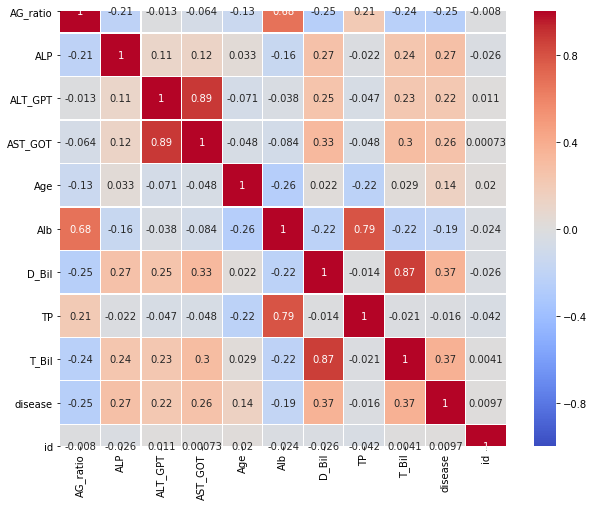

In [51]:
# heatmapの表示
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), vmin=-1.0, vmax=1.0, annot=True, cmap='coolwarm', linewidths=0.1)
plt.show()

In [52]:
df['Gender'] = df['Gender'].apply(lambda x:1 if x=='Male' else 0)

In [53]:
df.head()

,AG_ratio,ALP,ALT_GPT,AST_GOT,Age,Alb,D_Bil,Gender,TP,T_Bil,disease,id
0,1.01,170.9,42.1,37.1,60,2.9,1.3,1,5.5,2.9,1.0,0
1,1.36,158.8,26.0,23.9,28,3.7,0.1,0,6.4,0.7,0.0,1
2,0.96,962.0,53.0,40.9,60,3.3,12.5,1,6.8,23.1,1.0,2
3,1.31,415.9,33.9,39.0,20,3.8,0.5,1,7.0,1.0,0.0,3
4,1.04,152.9,40.9,42.0,44,2.1,0.3,0,4.5,0.6,0.0,4


In [54]:
#学習用と評価用のデータに戻す
train = df.iloc[train.index]
test = df.iloc[test.index]
test = test.drop(['disease'],axis=1)

y = train['disease']
X = train.drop(['disease'],axis=1)

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#データの分割はいらない

In [75]:
#モデルの学習
lr = LogisticRegression()
lr.fit(X,y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
ypred = lr.predict_proba(test)[:,1]

In [77]:
sam = pd.read_csv('sample_submit.csv',header=None)

In [78]:
sam[1] = ypred
#これで一応は完成。ここからいろいろやってく。
sam.to_csv('submit4.csv',header=None,index=None)

In [84]:
'''[84]~[88]まではAUCとかの確認だけ'''
#y_testが欲しいからtrainデータを分割させる
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix

#混同行列の作製
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
#混同行列をデータフレーム化
dfcm = pd.DataFrame(np.rot90(cm,2), index=['actual_Positive','actual_negative'], columns=['predict_Positive','predict_negative'])
dfcm

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,predict_Positive,predict_negative
actual_Positive,62,28
actual_negative,10,79


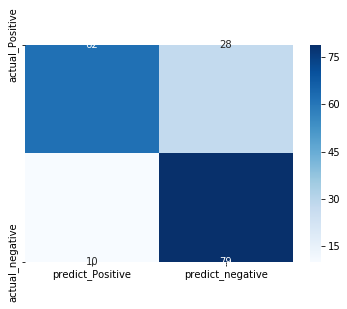

In [85]:
sns.heatmap(dfcm, annot=True, fmt='2g',cmap='Blues')
plt.yticks(va='center')
plt.show()

In [86]:
from sklearn.metrics import roc_auc_score, roc_curve

0.8644194756554306


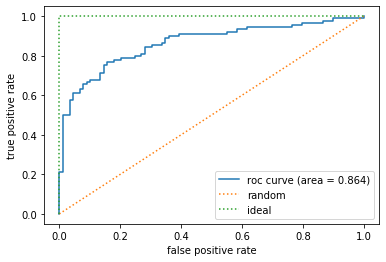

In [88]:
# モデルの予測（疾患あり(=1)に属する確率の算出）
y_pred_prob = lr.predict_proba(X_test)[:, 1]
# AUCスコアの算出
auc_score = roc_auc_score(y_true=y_test, y_score=y_pred_prob)
print(auc_score)

# ROC曲線の要素（偽陽性率、真陽性率、閾値）の算出
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred_prob)

# ROC曲線の描画
plt.plot(fpr, tpr, label='roc curve (area = %0.3f)' % auc_score)
plt.plot([0, 1], [0, 1], linestyle=':', label='random')
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', label='ideal')
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

In [91]:
#ここから改善してく
y = train['disease']
X = train.drop(['disease'],axis=1)
#等間隔のbin分割
X_cut, bin_indice = pd.cut(X['T_Bil'],bins=5,retbins=True)
X_cut.value_counts()

(0.357, 8.96]     828
(8.96, 17.52]      33
(17.52, 26.08]     21
(26.08, 34.64]      8
(34.64, 43.2]       1
Name: T_Bil, dtype: int64

In [92]:
# 境界値を指定したbinの分割
bins_T_Bil = [0,0.5,1,100]
X_cut, bin_indice = pd.cut(X['T_Bil'],bins=bins_T_Bil,retbins=True)
# bin分割した結果の表示
print("binの区切り: ", bin_indice)

print("--- bin区切りごとのデータ数 ---")
print(X_cut.value_counts())

binの区切り:  [  0.    0.5   1.  100. ]
--- bin区切りごとのデータ数 ---
(1.0, 100.0]    486
(0.5, 1.0]      378
(0.0, 0.5]       27
Name: T_Bil, dtype: int64


In [95]:
# binの境界値を指定
bins_T_Bil = [0, 0.5, 1.0, 100]

# T_Bil列を分割し、0始まりの連番でラベル化した結果を、X_cutに格納する
df_cut, bin_indice = pd.cut(df["T_Bil"], bins=bins_T_Bil, retbins=True, labels=False)

# bin分割した結果をダミー変数化 (prefix=X_Cut.nameは、列名の接頭語を指定している)
df_dummies = pd.get_dummies(df_cut, prefix=X_cut.name)

# 元の説明変数のデータフレーム(X)と、ダミー変数化の結果(X_dummies)を横連結
df_binned = pd.concat([df,df_dummies], axis=1)

# 結果の確認
print(df_binned.head())

   AG_ratio    ALP  ALT_GPT  AST_GOT  Age  Alb  D_Bil  Gender   TP  T_Bil  \
0      1.01  170.9     42.1     37.1   60  2.9    1.3       1  5.5    2.9   
1      1.36  158.8     26.0     23.9   28  3.7    0.1       0  6.4    0.7   
2      0.96  962.0     53.0     40.9   60  3.3   12.5       1  6.8   23.1   
3      1.31  415.9     33.9     39.0   20  3.8    0.5       1  7.0    1.0   
4      1.04  152.9     40.9     42.0   44  2.1    0.3       0  4.5    0.6   

   disease  id  T_Bil_0  T_Bil_1  T_Bil_2  
0      1.0   0        0        0        1  
1      0.0   1        0        1        0  
2      1.0   2        0        0        1  
3      0.0   3        0        1        0  
4      0.0   4        0        1        0  


In [108]:
#学習用と評価用のデータに戻す
train = df_binned.iloc[train.index]
test = df_binned.iloc[test.index]
test = test.drop(['disease'],axis=1)

y = train['disease']
X = train.drop(['disease'],axis=1)
# 学習用・評価用データの分割（元の説明変数Xの代わりに、bin分割したX_binnedを使う）
X_train, X_test, y_train, y_test = train_test_split(X_binned, y, test_size=0.3, random_state=0)

# モデルの学習・予測
model2 = LogisticRegression()
model2.fit(X_train, y_train)
y_pred = model2.predict(test)
sam[1] = y_pred
sam.to_csv('submit5.csv',header=None,index=None)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [111]:
model3 =LogisticRegression()
model3.fit(X,y)
y_pred = model3.predict(test)
sam[1] = y_pred
sam.to_csv('submit6.csv',header=None,index=None)
print(y_pred.shape,sam.shape)

(382,) (382, 2)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [110]:
#https://quest.signate.jp/quests/10002/contents/1/6/3
#これからやっとく